Data on lainattu Kagglen Titanic-kilpailun 
[sivuilta](https://www.kaggle.com/c/titanic) 
ja on ladattavissa ilmaiseksi. Viittaathan aina alkuperäiseen lähteeseen, jos otat datan käyttöösi.

# Logistinen regressio: tehtävä

Ensimmäinen projektisi on päättynyt etkä ollut täysin tyytyväinen sen tuloksiin. Olet aloittamassa toista projektia ja asiakkaasi on liverpoolilainen vakuutusyhtiö, joka myy henkivakuutuksia matkustajille, jotka ovat lähdössä vaaralliselle laivamatkalle Atlannin yli kohti New Yorkia. Yhtiö miettii, kenelle se tarjoaisi vakuutusta ja millä hinnalla. Sinun tehtäväsi on rakentaa hinnoittelun tueksi koneoppimismalli, joka ennustaa, millä todennäköisyydellä matkustaja selviää matkasta, jos laiva joutuu onnettomuuteen.

Mallin kehittelemiseksi tarvitset dataa aiemmasta, vastaavasta tilanteesta. Muistat, että Englannista on aiemmin lähtenyt kohti New Yorkia laiva, joka törmäsi jäävuoreen ja upposi. Onneksesi tästä matkasta on dataa saatavilla, joten päätät ottaa sen käyttöösi.

Käsiin saamassasi datassa on seuraavat muuttujat:

Variable |	Definition |	Key
---|---|---
survival|	Survival|	0 = No, 1 = Yes
pclass|	Ticket class|	1 = 1st, 2 = 2nd, 3 = 3rd
sex|	Sex|	
Age|	Age in years	|
sibsp|	# of siblings / spouses aboard the Titanic	|
parch|	# of parents / children aboard the Titanic	|
ticket|	Ticket number	|
fare|	Passenger fare	|
cabin|	Cabin number	|
embarked|	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton|


Variable Notes

pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

Päätät tehdä analyysin edellisen tehtäväsi tapaan Python-ohjelmointikielellä. Muistat, että Pythonissa oli kätevä kirjasto datankäsittelyyn, joten päätät hakea sen työtilaasi

In [1]:
import pandas as pd

In [62]:
# olettaa, että datasetti tallennettu samaan kansioon, kun tämä muistikirja. jos näin ei ole, muokkaa
df_orig = pd.read_csv("train.csv")

Haluat saada käsityksen siitä, miltä datasetti näyttää. Tulostat sitä varten osan datasetistä ruudullesi. (Tähän on useampi tapa ja voit valita mieleisesi täysin vapaasti.)

In [63]:
df_orig.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Haluat saada tarkemman käsityksen muuttujista, joten päätät tulostaa datakehyksen tietoja. (Tähän ei jälleen ole yhtä ja oikeaa vastausta.)

In [4]:
df_orig.shape

(891, 12)


In [64]:
df_orig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


Muistat, että aiempi projektisi oli melko haasteellinen, koska luokkasi olivat epätasapainossa. Päätätkin tarkastella selviytyneiden määrää datakehikossasi suhteessa niihin, jotka eivät selviytyneet.

In [65]:
# rakennetaan taulukko selvinneistä niin, että se tulostuu siistissä muodossa
# valitaan datakehyksestä muuttuja sopiva muuttuja ja lasketaan nollien ja ykkösten määrä 
taulukko = pd.crosstab(index = df_orig['Survived'], columns = 'count')

# nimetään taulukon osat niin, että lopputulos on hyvin ymmärrettävissä
taulukko.columns = ['lukumäärä']
taulukko.index = ['selvisi', 'ei selvinnyt']

# tulostetaan vielä valmis taulukko
taulukko

,lukumäärä
selvisi,549
ei selvinnyt,342


Haluat vielä hahmottaa suhdelukua tarkemmin, joten päätät piirtää kuvan.

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

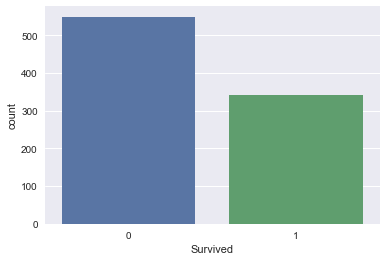

In [67]:
# valitse sopiva muuttuja ja datasetin nimi
sns.countplot(x = 'Survived', data = df_orig)
plt.show()

Katsot datakehyksen tietoja, jotka olit tulostanut aiemmin ja pohdit, ovatko kaikki muuttujat hyödyllisiä analyysissasi. Ainakaan matkustajatunnus tai nimi eivät vaikuta hyödyllisiltä, joten päätät poistaa ne. (Mallivastauksessa on poistettu myös lähtösatama.) 

In [71]:
# datakehyksestä on tässä vaiheessa otettu kopio
df = df_orig.drop(['PassengerId', 'Name', 'Embarked'], axis = 1)

Huomaat myös, että datassa on puuttuvia arvoja iän hyttitietojen kohdalla. Tehtävässä on korvattu iän kohdalta keskiarvolla ja päätelty, että hytin kohdalla puuttuva tieto tarkoittaa kansipaikkaa tai vastaavaa. Tätä varten on luotu uusi luokka. Myös muut vaihtoehdot ja tarkempi katsaus dataan ovat suositeltavia, mahdollisesti lisätehtävänä myöhemmin.

In [72]:
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Cabin'] = df['Cabin'].fillna('None')

Seuraavaksi huomaat, että osa muuttujista on kategorisia ja ne ovat datakehyksessä objekteina. Nämä kaipaavat hieman käsittelyä. Kategoriset muuttujat muutetaan regressioanalyysia varten dummy-muuttujiksi (käytetään myös termiä one hot encoding). Dummy-muuttuja saa arvon 1, jos havainto kuuluu johonkin luokkaan ja arvon 0, jos se ei kuulu. Tämä on tehty valmiiksi, mutta huolehdithan siitä, että jäljellä ovat samat muuttujat kun mallivastauksessa.

In [73]:
df = pd.get_dummies(df, columns = ['Pclass', 'Sex', 'Ticket', 'Cabin'],   # valitse muuttujien nimet
                   prefix = ['Pclass', 'Sex', 'Ticket', 'Cabin'])         # vastaavien dummy-muuttujien nimet

Katsotaanpa taas, miltä näyttää

In [44]:
df.head()

,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,...,Cabin_F E69,Cabin_F G63,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_None,Cabin_T
0,0,22.0,1,0,7.2500,0,0,1,0,1,...,0,0,0,0,0,0,0,0,1,0
1,1,38.0,1,0,71.2833,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,1,0,...,0,0,0,0,0,0,0,0,1,0
3,1,35.0,1,0,53.1000,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,35.0,0,0,8.0500,0,0,1,0,1,...,0,0,0,0,0,0,0,0,1,0


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Columns: 839 entries, Survived to Cabin_T
dtypes: float64(2), int64(3), uint8(834)
memory usage: 760.6 KB


Nyt olet valmis aloittamaan mallin kehittämisen. Ensimmäinen tehtäväsi on jakaa malli harjoitus- ja testidataan. Muistat myös, että alkuperäinen data saattaa olla järjestyksessä ja päätät sekoittaa sen.

In [75]:
# hae datan sekoittamiseen tarvittava moduuli
from sklearn.utils import shuffle

In [76]:
# sekoitetaan datakehys
df = shuffle(df)

# erota selviytymistä kuvaava muuttuja datakehyksestä omaksi vektorikseen ja poista se datakehyksestä
Y = df[['Survived']].values.ravel()
X = df.drop(['Survived'], axis = 1)

# muodostetaan harjoitus- ja testidata
Ytrain = Y[:int(0.8*len(Y))]
Ytest = Y[int(0.8*len(Y)):]

Xtrain = X[:int(0.8*len(Y))]
Xtest = X[int(0.8*len(Y)):]

Tarkasta, että datasetti näyttää siltä, miltä pitääkin. Tähän ei jälleen ole yhtä oikeaa tapaa, mutta koko datakehyksen tulostamista näytölle ei suositella.

In [46]:
Ytest[:5]

array([0, 0, 0, 0, 0])

In [77]:
Xtest.head()

,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Ticket_110152,...,Cabin_F E69,Cabin_F G63,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_None,Cabin_T
128,29.699118,1,1,22.3583,0,0,1,1,0,0,...,1,0,0,0,0,0,0,0,0,0
704,26.000000,1,0,7.8542,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
398,23.000000,0,0,10.5000,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
552,29.699118,0,0,7.8292,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
34,28.000000,1,0,82.1708,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


Haet sklearninsta sopivan kirjaston (tämä on tehty valmiiksi) ja estimoit mallin harjoitusdatalla.

In [48]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression();

In [78]:
logreg.fit(Xtrain, Ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Päätät testata mallia aluksi valitsemalla vain pari ensimmäistä havaintoa ja ennustamalla näiden kohtaloa.

In [81]:
logreg.predict(Xtest[0:3])

array([1, 0, 0])

In [80]:
Ytest[:3]

array([1, 0, 0])

Mallisi näyttäisi toimivan, joten päätät selvittää tarkemmin, miten hyvin se toimii. Ajat siis mallin koko testijoukolle

In [82]:
pred = logreg.predict(Xtest)

Lasket ensin mallin tarkkuuden eli todennäköisyyden, jolla se ennustaa matkustajan kohtalon oikein.

In [84]:
# valitse muuttujalle jokin sopiva nimi ja tulosta se näytölle
score = logreg.score(Xtest, Ytest)
score

0.8268156424581006

Edellisestä tehtävästäsi muistat, että on hyvä tarkastaa, että malli todella ennustaa molempia mahdollisia tulemia oikein. Tämän selvittämiseksi päätät laskea mallin konfuusiomatriisin.

In [87]:
from sklearn import metrics
# lisää argumenteiksi testijoukon tulemat sekä mallisi antama ennuste
cmat = metrics.confusion_matrix(Ytest, pred)
cmat

array([[93, 17],
       [14, 55]])

Mallisi näyttää mielestäsi huomattavasti tasapainoisemmalta kun edellisellä kerralla. Päätät kuitenkin havainnollistaa asiaa lämpökartan avulla.

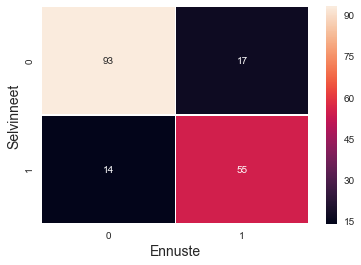

In [89]:
sns.heatmap(cmat, annot = True, linewidths = .2)

plt.ylabel('Selvinneet', fontsize = 14)
plt.xlabel('Ennuste', fontsize = 14)
plt.show()

Olet varsin tyytyväinen lämpökarttasi värimaailmaan, mutta haluat varmistua mallisi toimintakyvystä. Muistat, että mallin toimintakykyä pystyi hahmottamaan ROC-käyrän avulla ja että malli oli erityisen hyvä, jos tämä käyrä oli lähellä vasenta ylänurkkaa. Piirrät siis kyseisen käyrän

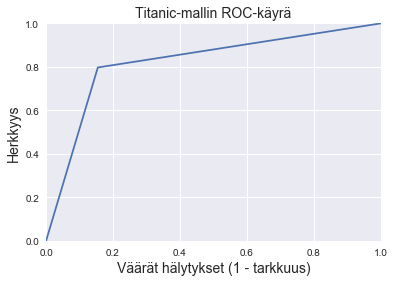

In [91]:
# lisää argumenteiksi testijoukon tulemat sekä mallisi antama ennuste
fpr, tpr, thresholds = metrics.roc_curve(Ytest, pred)

plt.plot(fpr, tpr); plt.xlim([0.0,1.0]); plt.ylim([0.0,1.0])
plt.title('Titanic-mallin ROC-käyrä', fontsize = 14)
plt.xlabel('Väärät hälytykset (1 - tarkkuus)', fontsize = 14)
plt.ylabel('Herkkyys', fontsize = 14)
plt.grid(True)
plt.show()

Lopuksi päätät myös laskea käyrän alapuolisen alan, koska muistat, että se antoi mittarin mallin toimintakyvylle

In [93]:
# lisää argumenteiksi testijoukon tulemat sekä mallisi antama ennuste
metrics.roc_auc_score(Ytest, pred)

0.8212779973649538

# Lisätehtävä: kysymyksiä

1. Miten mallin tarkkuus ja AUC suhteutuvat edelliseen malliin? Kumpi malleista on parempi?

2. Olet jakanut mallisi harjoitus- ja testidataan, jolloin voit testata mallisi toimintakykyä datalla, jota mallisi ei vielä ole nähnyt. Datasettisi on kuitenkin jollain tasolla hyvinkin spesifi. Pohdi, millaisten olosuhteiden vallitessa kyseistä mallia voi käyttää ennustamiseen. Jos kysymys tuntuu liian hassulta, pohdi asiaa jossain muussa yhteydessä, esimerkiksi pankin asuntolainapäätösten osalta.

3. Pohdi seuraavia asioita, kuvien piirtämisestä voi olla apua:
    * Kuka tai minkälaiset ihmiset selviävät datan mukaan onnettomuudesta todennäköisimmin?
    * Mitä tämä tarkoittaa vakuutusyhtiön kannalta? Kenelle kannattaa tarjota henkivakuutusta?
    * Onko tällä yhteiskunnallista merkitystä ja voiko samanlaista ilmiötä havaita muualla/ nyky-yhteiskunnassamme?

# Lisätehtävä: analyysi uudella datalla

Toista analyysi Kagglen sivuilta löytyvällä testidatalla. Testidatassa ei ole tietoa selviämisestä, mutta sen avulla näet, millaista on ennustaa mallin avulla uutta datasettiä, kun et voi olla varma mallin suoriutumisesta.

In [15]:
test = pd.read_csv("test.csv")

In [59]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# Bonustehtävä: Kaggle

Osallistu kilpailuun Kagglen sivuilla. Ryhmien muodostaminen on suositeltavaa.